In [1]:
import pandas as pd
import os
import csv

from math import pi, asin, sqrt, cos, sin
import numpy as np

from matplotlib import pyplot as plt

from datetime import datetime
%matplotlib inline

# DATI GPS

### Crea un csv riassuntivo dei dati GPS del crash (dopo agosto)

In [10]:
MAXFILES = 200001
counter = 0
missing = 0
with open('D:\\Master\Blob2csv\\crash_synt.csv','w', newline='') as fileout:
    writer = csv.writer(fileout, delimiter=";")
    header=[
        'date',
        'hour',
        'device'
    ]
    writer.writerow(header)
    for root,_,files in os.walk('D:\\Master\Blob2csv\POS\\'):
        for file in files:
            counter += 1
            if counter%1000==0:
                print(counter)
            elif counter>MAXFILES:
                break
            lt = file.split('_')
            if 'beforeAugust' not in file:
                data = '-'.join([lt[0],lt[1],lt[2]])
                ora = ':'.join([lt[3],lt[4],lt[5]])
                device = lt[7].lstrip('INFOMOBILITY')
            else:
                lt2 = lt[2].split()
                data = '-'.join([lt[0],lt[1],lt2[0]])
                ora = ':'.join([lt2[1],lt[3],lt[4]])
                device = device = lt[6]
            writer.writerow([data,ora,device])
#print(round(missing/counter*100,4), '%')

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

In [17]:
df = pd.read_csv('D:\\Master\Blob2csv\\crash_synt.csv', delimiter=';')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
print(len(df))
df.head()

187785


,date,hour,device
0,2018-02-12,10:03:29.000,268110
1,2018-02-12,15:24:22.000,266569
2,2018-02-12,15:26:36.000,266569
3,2018-02-12,15:30:48.000,266569
4,2018-02-12,15:35:13.000,264718


# esplora

In [19]:
print(min(df['date']), max(df['date']))

2018-02-12 00:00:00 2018-10-30 00:00:00


(0, 50)

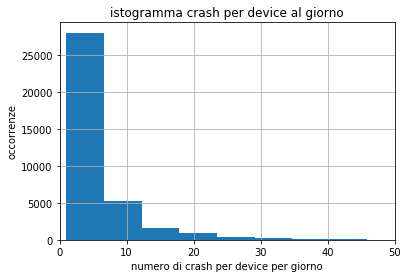

In [27]:
df.groupby(['device','date'])['hour'].count().hist(bins=50)
plt.xlabel('numero di crash per device per giorno')
plt.ylabel('occorrenze')
plt.title('istogramma crash per device al giorno')
plt.xlim([0,50])

(0, 40)

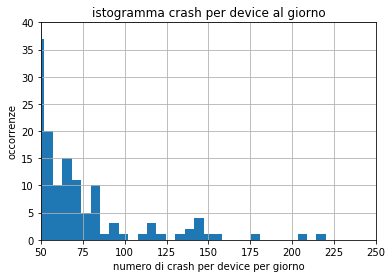

In [38]:
df.groupby(['device','date'])['hour'].count().hist(bins=50)
plt.xlabel('numero di crash per device per giorno')
plt.ylabel('occorrenze')
plt.title('istogramma crash per device al giorno')
plt.xlim([50,250])
plt.ylim(0,40)

In [14]:
print('Media crash per DEVICE e GIORNO:', df.groupby(['device','date'])['hour'].count().mean())
print('Mediana crash per DEVICE e GIORNO:', df.groupby(['device','date'])['hour'].count().median())

crashDeviceDay = list(df.groupby(['device','date'])['hour'].count())
crash1 = [c for c in crashDeviceDay if c==1]
crash2plus = [c for c in crashDeviceDay if c>=2]
crash5plus = [c for c in crashDeviceDay if c>=5]
crash10plus = [c for c in crashDeviceDay if c>=10]
nc = len(crashDeviceDay)

print(len(crash1)/nc)
print(len(crash2plus)/nc)
print(len(crash5plus)/nc)
print(len(crash10plus)/nc)

Media crash per DEVICE e GIORNO: 5.132560745620029
Mediana crash per DEVICE e GIORNO: 2.0
0.28316068548938145
0.7168393145106186
0.33118320715008065
0.15254051985677974


In [16]:
len(df.groupby(['device'])['hour'].count())

502

In [2]:
MAXFILES = 50000
counter = 0
missing = 0
with open('D:\\Master\Blob2csv\\crash_synt.csv','w', newline='') as fileout:
    writer = csv.writer(fileout, delimiter=";")
    header=[
        'date',
        'hour',
        'lat',
        'lon',
        'speed',
        'speed_5s_before',
        'speed_5s_after',
        'device',
        'trip',
        'voucher',
        'batch',
        'crash',
        'correction'
    ]
    writer.writerow(header)
    for root,_,files in os.walk('D:\\Master\Blob2csv\POS\\'):
        for file in files:
            #if file.endswith('_POS_beforeAugust.csv'):
            #    continue
            #counter += 1
            #if counter>MAXFILES:
            #    break
            filein = open(os.path.join(root,file),'r')
            reader = csv.reader(filein, delimiter=";")
            rows = [row for idx, row in enumerate(reader) if idx in (16,21,26,20)]
            v_b = rows[0][4]
            v_a = rows[2][4]
            flag = 0
            ''' 'datetime',
            'seconds_to_crash',
            'latitude',
            'longitude',
            'speed',
            'road',
            'limit',
            'deviceId',
            'tripId',
            'voucherId',
            'batchId',
            'crashId' '''
            try: # se senza info al momento del crash, va al secondo prima
                lat = rows[1][2]
                lon = rows[1][3]
                v = rows[1][4]
                t = rows[1][0].split(' ')[0]
                h = rows[1][0].split(' ')[1]
            except:
                try:
                    lat = rows[3][2]
                    lon = rows[3][3]
                    v = rows[3][4]
                    t = rows[3][0].split(' ')[0]
                    h = rows[3][0].split(' ')[1]
                    flag = 1
                except:
                    lat = ''
                    lon = ''
                    v = ''
                    t = ''
                    h = ''
                    flag = -1
                    print('No data for crash and 1s before for', file)
                    missing += 1
            dev = rows[1][7]
            trip = rows[1][8]
            vou = rows[1][9]
            batch = rows[1][10]
            crash = rows[1][11]
            writer.writerow([t,h,lat,lon,v,v_b,v_a,dev,trip,vou,batch,crash,flag])
            filein.close()
print(round(missing/counter*100,4), '%')

No data for crash and 1s before for 2018_08_01_11_55_45_49762340_INFOMOBILITY252146_135_POS.csv
No data for crash and 1s before for 2018_08_01_17_20_44_49794034_INFOMOBILITY268524_119_POS.csv
No data for crash and 1s before for 2018_08_02_14_03_44_49871324_INFOMOBILITY265072_129_POS.csv
No data for crash and 1s before for 2018_08_02_16_53_45_49888820_INFOMOBILITY270369_92_POS.csv
No data for crash and 1s before for 2018_08_02_20_23_44_49908061_INFOMOBILITY252151_176_POS.csv
No data for crash and 1s before for 2018_08_03_20_18_45_50005061_INFOMOBILITY248423_110_POS.csv
No data for crash and 1s before for 2018_08_04_07_13_44_50030062_INFOMOBILITY266656_157_POS.csv
No data for crash and 1s before for 2018_08_04_21_18_44_50101363_INFOMOBILITY256689_268_POS.csv
No data for crash and 1s before for 2018_08_05_04_28_42_50117048_INFOMOBILITY265463_97_POS.csv
No data for crash and 1s before for 2018_08_05_13_48_44_50150559_INFOMOBILITY264633_169_POS.csv
No data for crash and 1s before for 2018_0

No data for crash and 1s before for 2018_10_20_12_32_01_57052619_INFOMOBILITY248451_908_POS.csv
No data for crash and 1s before for 2018_10_21_01_12_04_57109354_INFOMOBILITY267482_523_POS.csv
No data for crash and 1s before for 2018_10_21_03_47_03_57112775_INFOMOBILITY264629_873_POS.csv
No data for crash and 1s before for 2018_10_22_14_27_01_57235942_INFOMOBILITY268686_609_POS.csv
No data for crash and 1s before for 2018_10_25_00_42_01_57458819_INFOMOBILITY267096_663_POS.csv
No data for crash and 1s before for 2018_10_27_19_27_33_57735220_INFOMOBILITY248736_911_POS.csv
No data for crash and 1s before for 2018_10_30_13_32_33_57951199_INFOMOBILITY269995_621_POS.csv
0.2244 %


### Esplora il csv riassuntivo

In [3]:
df = pd.read_csv('C:\\Users\leuci\Desktop\Blob2csv\\crash_synt.csv', delimiter=';')

In [4]:
print(len(df))
df.head()

41438


,date,hour,lat,lon,speed,speed_5s_before,speed_5s_after,device,trip,voucher,batch,crash,correction
0,2018-08-01,08:55:46,45.45953,9.17940,20.0,20.0,5.0,INFOMOBILITY270032,94,270032,49745233,PLACEHOLDER_27854,0
1,2018-08-01,08:55:51,45.44861,9.16033,28.0,0.0,38.0,INFOMOBILITY249439,131,249439,49745248,PLACEHOLDER_1621,0
2,2018-08-01,08:58:39,45.47626,9.22411,37.0,31.0,37.0,INFOMOBILITY267008,101,267008,49745519,PLACEHOLDER_10339,0
3,2018-08-01,09:00:05,45.47062,9.20109,41.0,29.0,40.0,INFOMOBILITY267100,135,267100,49745661,PLACEHOLDER_13451,0
4,2018-08-01,09:01:10,45.45943,9.19043,28.0,29.0,30.0,INFOMOBILITY268912,108,268912,49745759,PLACEHOLDER_19627,0


#### Crash per giorno

In [4]:
df.groupby('date')['crash'].count()

date
2018-08-01     563
2018-08-02     732
2018-08-03     669
2018-08-04     672
2018-08-05     628
2018-08-06     227
2018-08-07       2
2018-08-17       3
2018-08-19     184
2018-08-20     447
2018-08-21     550
2018-08-22     427
2018-08-23     561
2018-08-24     556
2018-08-25     311
2018-08-26     460
2018-08-27     503
2018-08-28     424
2018-08-29     524
2018-08-30     577
2018-08-31     170
2018-09-03     524
2018-09-04     638
2018-09-05     557
2018-09-06     473
2018-09-07     635
2018-09-08    1067
2018-09-09     253
2018-09-10     494
2018-09-11     606
              ... 
2018-09-30     637
2018-10-01     383
2018-10-02     449
2018-10-03     512
2018-10-04     596
2018-10-05     631
2018-10-06     606
2018-10-07     693
2018-10-08     475
2018-10-09     454
2018-10-10     210
2018-10-12     403
2018-10-13     806
2018-10-14     704
2018-10-15     337
2018-10-16     459
2018-10-17     539
2018-10-18     556
2018-10-19     633
2018-10-20     820
2018-10-21     567
2018-10

Text(0.5,1,'istogramma crash/giorno')

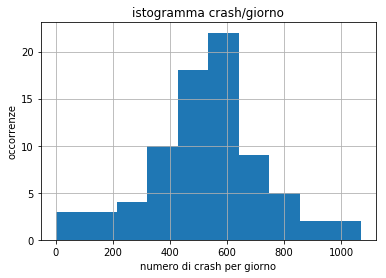

In [5]:
df.groupby('date')['crash'].count().hist()
plt.xlabel('numero di crash per giorno')
plt.ylabel('occorrenze')
plt.title('istogramma crash/giorno')

In [6]:
print('Media crash per GIORNO:', df.groupby('date')['crash'].count().mean())
print('Mediana crash per GIORNO:', df.groupby('date')['crash'].count().median())

Media crash per GIORNO: 530.0641025641025
Mediana crash per GIORNO: 537.0


#### Crash per trip

In [7]:
df.groupby('trip')['crash'].count()

trip
${tripId}     1
100          34
1000          1
1001          6
1002          4
1003          1
1005          5
1006          4
1008          1
1009          5
101          22
1010          1
1011          5
1012          5
1013          1
1014          2
1015          4
1016          2
1017          4
1018          2
102          25
1020          6
1021          4
1022          3
1023          1
1024          5
1025          2
1026          7
1028          1
103          38
             ..
968           1
969           4
97           27
970           6
971           3
972           6
973           1
974           6
975           1
976           4
977           4
978           1
98           34
980           4
981           4
982           2
983           1
984           2
985           4
989           4
99           26
990           2
991           5
992           2
993           4
994           6
996           8
997           2
998           1
999           2
Name: crash, Length

Text(0.5,1,'istogramma crash/trip')

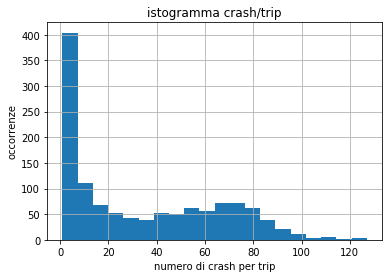

In [8]:
df.groupby('trip')['crash'].count().hist(bins=20)
plt.xlabel('numero di crash per trip')
plt.ylabel('occorrenze')
plt.title('istogramma crash/trip')

In [9]:
print('Media crash per TRIP:', df.groupby('trip')['crash'].count().mean())
print('Mediana crash per TRIP:', df.groupby('trip')['crash'].count().median())

Media crash per TRIP: 33.77180114099429
Mediana crash per TRIP: 23.0


#### CRASH PER DEVICE

In [10]:
df.groupby('device')['crash'].count()

device
INFOMOBILITY122354              11
INFOMOBILITY244737              25
INFOMOBILITY244763              10
INFOMOBILITY248198              16
INFOMOBILITY248199              41
INFOMOBILITY248200              27
INFOMOBILITY248202              22
INFOMOBILITY248264              15
INFOMOBILITY248267              22
INFOMOBILITY248271              18
INFOMOBILITY248283              15
INFOMOBILITY248328              18
INFOMOBILITY248329              39
INFOMOBILITY248423              33
INFOMOBILITY248440              17
INFOMOBILITY248448              35
INFOMOBILITY248451             264
INFOMOBILITY248731             285
INFOMOBILITY248736             385
INFOMOBILITY248746              39
INFOMOBILITY249435              13
INFOMOBILITY249436             240
INFOMOBILITY249437              18
INFOMOBILITY249438              24
INFOMOBILITY249439             100
INFOMOBILITY249440              34
INFOMOBILITY249442              12
INFOMOBILITY249443              14
INFOMOBILITY2

Text(0.5,1,'istogramma crash/device')

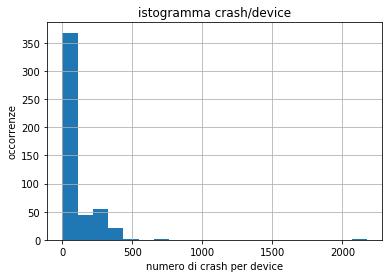

In [11]:
df.groupby('device')['crash'].count().hist(bins=20)
plt.xlabel('numero di crash per device')
plt.ylabel('occorrenze')
plt.title('istogramma crash/device')

In [12]:
print('Media crash per DEVICE:', df.groupby('device')['crash'].count().mean())
print('Mediana crash per DEVICE:', df.groupby('device')['crash'].count().median())

Media crash per DEVICE: 84.39511201629328
Mediana crash per DEVICE: 21.0


Text(0.5,1,'istogramma crash per device al giorno')

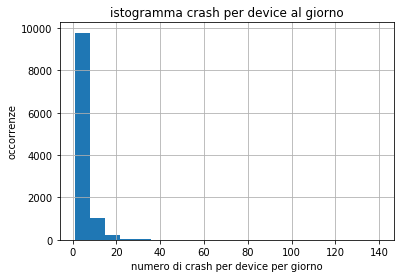

In [13]:
df.groupby(['device','date'])['crash'].count().hist(bins=20)
plt.xlabel('numero di crash per device per giorno')
plt.ylabel('occorrenze')
plt.title('istogramma crash per device al giorno')

(0, 50)

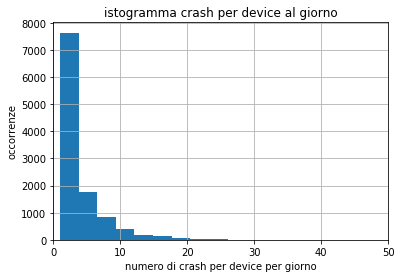

In [28]:
df.groupby(['device','date'])['crash'].count().hist(bins=50)
plt.xlabel('numero di crash per device per giorno')
plt.ylabel('occorrenze')
plt.title('istogramma crash per device al giorno')
plt.xlim([0,50])

In [14]:
print('Media crash per DEVICE e GIORNO:', df.groupby(['device','date'])['crash'].count().mean())
print('Mediana crash per DEVICE e GIORNO:', df.groupby(['device','date'])['crash'].count().median())

Media crash per DEVICE e GIORNO: 3.712400107748945
Mediana crash per DEVICE e GIORNO: 2.0


In [24]:
print('Media crash per DEVICE e GIORNO:', df.groupby(['device','date'])['crash'].count().mean())
print('Mediana crash per DEVICE e GIORNO:', df.groupby(['device','date'])['crash'].count().median())

crashDeviceDay = list(df.groupby(['device','date'])['crash'].count())
crash1 = [c for c in crashDeviceDay if c==1]
crash2plus = [c for c in crashDeviceDay if c>=2]
crash5plus = [c for c in crashDeviceDay if c>=5]
crash10plus = [c for c in crashDeviceDay if c>=10]
nc = len(crashDeviceDay)

print(len(crash1)/nc)
print(len(crash2plus)/nc)
print(len(crash5plus)/nc)
print(len(crash10plus)/nc)

0.41285804076501753
0.5871419592349825
0.24961838915327286
0.08009338241896381


## concentriamoci su settembre 2018

In [31]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,hour,lat,lon,speed,speed_5s_before,speed_5s_after,device,trip,voucher,batch,crash,correction
0,2018-08-01,08:55:46,45.45953,9.17940,20.0,20.0,5.0,INFOMOBILITY270032,94,270032,49745233,PLACEHOLDER_27854,0
1,2018-08-01,08:55:51,45.44861,9.16033,28.0,0.0,38.0,INFOMOBILITY249439,131,249439,49745248,PLACEHOLDER_1621,0
2,2018-08-01,08:58:39,45.47626,9.22411,37.0,31.0,37.0,INFOMOBILITY267008,101,267008,49745519,PLACEHOLDER_10339,0
3,2018-08-01,09:00:05,45.47062,9.20109,41.0,29.0,40.0,INFOMOBILITY267100,135,267100,49745661,PLACEHOLDER_13451,0
4,2018-08-01,09:01:10,45.45943,9.19043,28.0,29.0,30.0,INFOMOBILITY268912,108,268912,49745759,PLACEHOLDER_19627,0


In [36]:
dfset = df[df['date']>=datetime.strptime('2018-09-01', '%Y-%m-%d')]
dfset = dfset[dfset['date']<=datetime.strptime('2018-09-30', '%Y-%m-%d')]

Text(0.5,1,'istogramma crash per device per giorno')

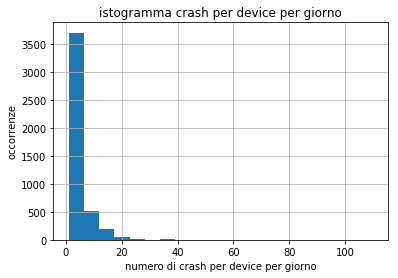

In [42]:
dfset.groupby(['device','date'])['crash'].count().hist(bins=20)
plt.xlabel('numero di crash per device per giorno')
plt.ylabel('occorrenze')
plt.title('istogramma crash per device per giorno')

(0, 50)

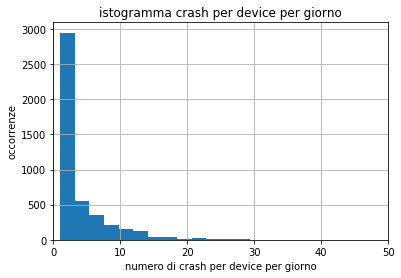

In [49]:
dfset.groupby(['device','date'])['crash'].count().hist(bins=50)
plt.xlabel('numero di crash per device per giorno')
plt.ylabel('occorrenze')
plt.title('istogramma crash per device per giorno')
plt.xlim([0,50])

Text(0.5,1,'istogramma crash per device per giorno')

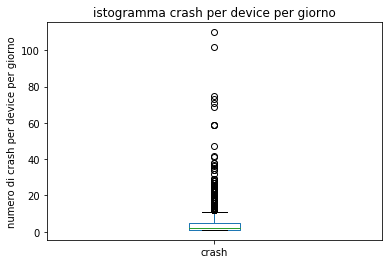

In [52]:
dfset.groupby(['device','date'])['crash'].count().plot.box()
plt.ylabel('numero di crash per device per giorno')
plt.title('istogramma crash per device per giorno')

In [41]:
print('Media crash per DEVICE e GIORNO:', dfset.groupby(['device','date'])['crash'].count().mean())
print('Mediana crash per DEVICE e GIORNO:', dfset.groupby(['device','date'])['crash'].count().median())

Media crash per DEVICE e GIORNO: 4.0168926428095135
Mediana crash per DEVICE e GIORNO: 2.0


In [53]:
crashDeviceDay = list(dfset.groupby(['device','date'])['crash'].count())
crash1 = [c for c in crashDeviceDay if c==1]
crash2minus = [c for c in crashDeviceDay if c<=2]
crash2plus = [c for c in crashDeviceDay if c>=2]
crash5plus = [c for c in crashDeviceDay if c>=5]
crash10plus = [c for c in crashDeviceDay if c>=10]
nc = len(crashDeviceDay)

print('crash/day/device = 1:',round(len(crash1)/nc,3),'%')
print('crash/day/device <= 2:',round(len(crash2minus)/nc,3),'%')
print('crash/day/device >= 2:',round(len(crash2plus)/nc,3),'%')
print('crash/day/device >= 5:',round(len(crash5plus)/nc,3),'%')
print('crash/day/device >= 10:',round(len(crash10plus)/nc,3),'%')

crash/day/device = 1: 0.39 %
crash/day/device <= 2: 0.546 %
crash/day/device >= 2: 0.61 %
crash/day/device >= 5: 0.279 %
crash/day/device >= 10: 0.097 %


In [61]:
dfset.groupby(['date']).device.nunique().mean()

160.67857142857142

## DIVISIONE PER TIPO STRADA

## DATI GPS: STUDIO DEGLI SPOSTAMENTI

In [4]:
def earth_distance(lat1, lon1, lat2, lon2):  # da notebook master big data
    lat_lng1 = (float(lat1), float(lon1))
    lat_lng2 = (float(lat2), float(lon2))
    lat1, lng1 = [l*pi/180 for l in lat_lng1]
    lat2, lng2 = [l*pi/180 for l in lat_lng2]
    dlat, dlng = lat1-lat2, lng1-lng2
    ds = 2 * asin(sqrt(sin(dlat/2.0) ** 2 + cos(lat1) * cos(lat2) * sin(dlng/2.0) ** 2))
    return 6371.01 * ds  # spherical earth...

In [5]:
dfp = pd.DataFrame()
counter = 0

MAXFILE=10000

for root,_,files in os.walk('C:\\Users\leuci\Desktop\Blob2csv\POS\\'):
    for file in files:
        rows = []
        if file.endswith('_POS_beforeAugust.csv'):
            continue
        counter +=1
        filein = open(os.path.join(root,file),'r')
        reader = csv.reader(filein, delimiter=";")
        next(reader,None)
        plat = None  # lat del punto precedente (per calcolo distanza e velocità)
        plon = None
        lat = None  # lat del punto corrente
        lon = None
        ph = None  # ora del punto precedente (per calcolo distanza e velocità)
        h = None
        for row in reader:
            if not lat=='':  # lat non è ancora modificato: si riferisce al punto precedente!
                plat = lat
                plon = lon
            else:
                plat = None
                plon = None
            lat = row[2]
            lon = row[3]
            v = row[4]
            crash = row[11]
            road = row[5]
            ph = h
            try:
                t = row[0].split(' ')[0]
                h = row[0].split(' ')[1]
            except:
                t = None
                h = None
            rows.append([lat,lon,plat,plon,v,t,h,ph,crash,road])
        df_temp = pd.DataFrame(rows, columns = ['lat',
                                                'lon',
                                                'prev_lat',
                                                'prev_lon',
                                                'speed',
                                                'date',
                                                'hour',
                                                'prev_hour',
                                                'crashId',
                                                'road'])
        if counter == MAXFILE:
            break
        if counter%100==0:
            print(counter)
        df_temp = df_temp.dropna()
        df_temp['distance'] = df_temp.apply(lambda r:
                                           earth_distance(
                                           r['lat'],r['lon'],r['prev_lat'],r['prev_lon']), axis=1)
        df_temp['speed_calc'] = df_temp.apply(lambda r:
                                             r['distance']/(datetime.strptime(r['hour'], '%H:%M:%S')-
                                             datetime.strptime(r['prev_hour'], '%H:%M:%S')).total_seconds()*3600,axis=1)
        dfp = pd.concat([dfp,df_temp])
dfp['speed'] = dfp['speed'].astype('float')

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [64]:
len(dfp)

370066

In [65]:
dfp.head()

,lat,lon,prev_lat,prev_lon,speed,date,hour,prev_hour,crashId,road,distance,speed_calc
1,45.45935,9.17878,45.45936,9.17879,0.0,2018-08-01,08:55:28,08:55:27,PLACEHOLDER_27854,1,0.001358,4.889564
2,45.45935,9.17879,45.45935,9.17878,0.0,2018-08-01,08:55:29,08:55:28,PLACEHOLDER_27854,1,0.000780,2.807781
3,45.45935,9.17879,45.45935,9.17879,0.0,2018-08-01,08:55:30,08:55:29,PLACEHOLDER_27854,1,0.000000,0.000000
4,45.45935,9.17879,45.45935,9.17879,0.0,2018-08-01,08:55:31,08:55:30,PLACEHOLDER_27854,1,0.000000,0.000000
5,45.45935,9.17879,45.45935,9.17879,0.0,2018-08-01,08:55:32,08:55:31,PLACEHOLDER_27854,1,0.000000,0.000000


In [66]:
dfp.describe(include='all')

,lat,lon,prev_lat,prev_lon,speed,date,hour,prev_hour,crashId,road,distance,speed_calc
count,370066,370066,370066,370066,370066,370066,370066,370066,370066,370066,370066.000000,370066.000000
unique,31561,37404,31611,37462,195,23,75747,75747,9233,3,NaN,NaN
top,45.45204,9.1833,45.45204,9.1833,0.0,2018-08-02,21:48:58,21:48:57,PLACEHOLDER_8730,1,NaN,NaN
freq,874,261,877,259,61466,27864,22,22,80,349083,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009809,35.312779
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007086,25.510658
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-0.000690
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004516,16.256278
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009663,34.785413
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014047,50.567859


In [67]:
dfp.groupby('road')['road'].count()

road
1    349083
2     19608
3      1375
Name: road, dtype: int64

Text(0,0.5,'freq')

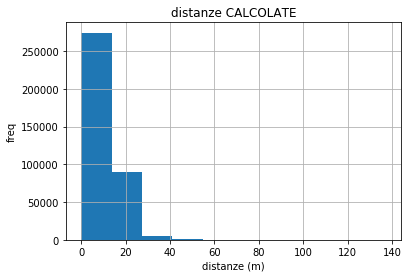

In [68]:
d = dfp.distance*1000
d.hist()
plt.title('distanze CALCOLATE')
plt.xlabel('distanze (m)')
plt.ylabel('freq')

Text(0,0.5,'freq')

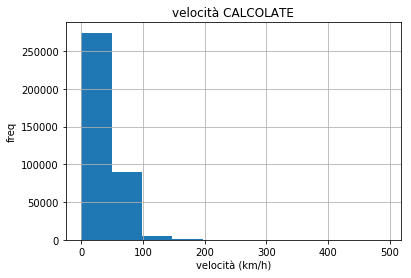

In [69]:
dfp.speed_calc.hist()
plt.title('velocità CALCOLATE')
plt.xlabel('velocità (km/h)')
plt.ylabel('freq')

Text(0,0.5,'velocità (km/h)')

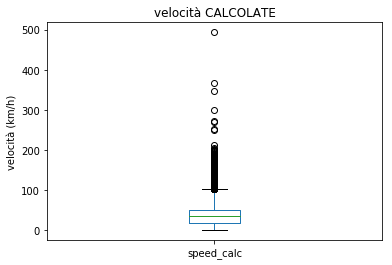

In [70]:
dfp.speed_calc.plot.box()
plt.title('velocità CALCOLATE')
plt.ylabel('velocità (km/h)')

In [ ]:
dfp.speed.hist()
plt.title('velocità MISURATE')
plt.xlabel('velocità (km/h)')
plt.ylabel('freq')

In [ ]:
dfp.speed.plot.box()
plt.title('velocità MISURATE')
plt.ylabel('velocità (km/h)')

media -1.0398171686200997


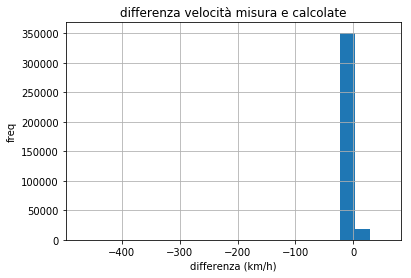

In [7]:
s = dfp['speed'].astype('float')-dfp['speed_calc']
s.hist(bins=20)
plt.title('differenza velocità misura e calcolate')
plt.xlabel('differenza (km/h)')
plt.ylabel('freq')
print('media', np.mean(s))

Text(0,0.5,'differenza (km/h)')

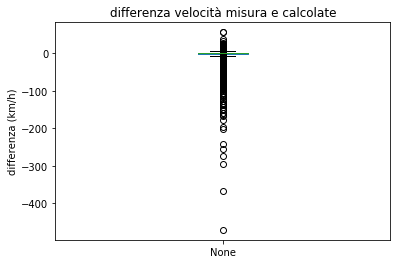

In [9]:
s = dfp['speed'].astype('float')-dfp['speed_calc']
s.plot.box()
plt.title('differenza velocità misura e calcolate')
plt.ylabel('differenza (km/h)')

Text(0,0.5,'velocità calcolata')

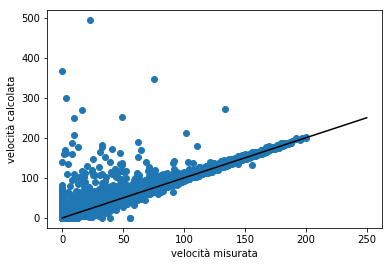

In [10]:
plt.scatter(dfp['speed'].astype('float'),dfp['speed_calc'])
plt.plot([0,250], [0, 250], 'k-')
plt.xlabel('velocità misurata')
plt.ylabel('velocità calcolata')


Text(0.5,1,'ROAD TYPE: 1')

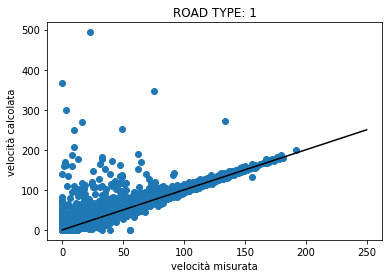

In [34]:
plt.scatter(dfp[dfp['road']=='1']['speed'].astype('float'),dfp[dfp['road']=='1']['speed_calc'])
plt.plot([0,250], [0, 250], 'k-')
plt.xlabel('velocità misurata')
plt.ylabel('velocità calcolata')
plt.title('ROAD TYPE: 1')

Text(0.5,1,'ROAD TYPE: 2')

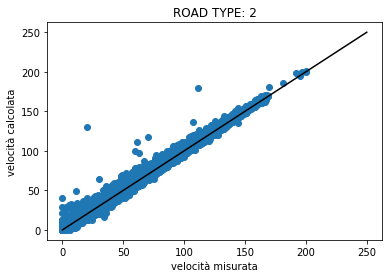

In [35]:
plt.scatter(dfp[dfp['road']=='2']['speed'].astype('float'),dfp[dfp['road']=='2']['speed_calc'])
plt.plot([0,250], [0, 250], 'k-')
plt.xlabel('velocità misurata')
plt.ylabel('velocità calcolata')
plt.title('ROAD TYPE: 2')

Text(0.5,1,'ROAD TYPE: 3')

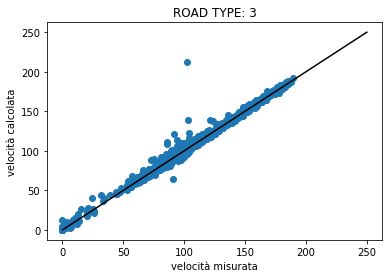

In [37]:
plt.scatter(dfp[dfp['road']=='3']['speed'].astype('float'),dfp[dfp['road']=='3']['speed_calc'])
plt.plot([0,250], [0, 250], 'k-')
plt.xlabel('velocità misurata')
plt.ylabel('velocità calcolata')
plt.title('ROAD TYPE: 3')

In [11]:
dfp[dfp['speed_calc']>250]

,lat,lon,prev_lat,prev_lon,speed,date,hour,prev_hour,crashId,road,distance,speed_calc
26,45.49388,9.21089,45.49312,9.21162,0.0,2018-08-01,17:11:01,17:11:00,PLACEHOLDER_15131,1,0.101879,366.765287
36,45.49189,9.21144,45.4925,9.21103,16.0,2018-08-01,20:27:40,20:27:39,PLACEHOLDER_15133,1,0.074981,269.931462
6,45.48173,9.11978,45.48157,9.12072,134.0,2018-08-02,19:33:29,19:33:28,PLACEHOLDER_39,1,0.075414,271.490150
20,45.48805,9.20454,45.48761,9.20518,49.0,2018-08-22,06:52:07,06:52:06,PLACEHOLDER_2906,1,0.069877,251.558343
33,45.49208,9.21078,45.49331,9.21066,23.0,2018-08-24,20:52:09,20:52:08,PLACEHOLDER_6843,1,0.137089,493.522033
22,45.49438,9.21134,45.49415,9.21217,10.0,2018-08-28,20:29:10,20:29:09,PLACEHOLDER_3844,1,0.069567,250.439430
4,45.48312,9.19299,45.48398,9.19281,75.0,2018-08-31,00:34:56,00:34:55,PLACEHOLDER_8719,1,0.096652,347.946944
21,45.44525,9.12611,45.44599,9.12596,3.0,2018-08-31,14:48:57,14:48:56,PLACEHOLDER_32037,1,0.083112,299.204264


In [27]:
dfp['speed'] = dfp['speed'].astype('float')
dfp.groupby('road')[['speed','speed_calc']].mean()

,speed,speed_calc
road,,
1,32.945623,33.989363
2,53.591340,54.553660
3,95.768727,96.917913


In [28]:
dfp['speed'] = dfp['speed'].astype('float')
dfp.groupby('road')[['speed','speed_calc']].median()

,speed,speed_calc
road,,
1,33.0,33.936736
2,50.0,51.257291
3,96.0,96.910775


In [29]:
dfp['speed'] = dfp['speed'].astype('float')
dfp.groupby('road')[['speed','speed_calc']].max()

,speed,speed_calc
road,,
1,192.0,493.522033
2,200.0,201.350952
3,189.0,211.847705


In [14]:
dfp[dfp['crashId']=='PLACEHOLDER_39']

,lat,lon,prev_lat,prev_lon,speed,date,hour,prev_hour,crashId,road,distance,speed_calc
1,45.48013,9.12119,45.47977,9.12121,140.0,2018-08-02,19:33:24,19:33:23,PLACEHOLDER_39,1,0.040061,144.218142
2,45.4805,9.12115,45.48013,9.12119,143.0,2018-08-02,19:33:25,19:33:24,PLACEHOLDER_39,1,0.041260,148.536769
3,45.48089,9.12103,45.4805,9.12115,150.0,2018-08-02,19:33:26,19:33:25,PLACEHOLDER_39,1,0.044364,159.709704
4,45.48126,9.12088,45.48089,9.12103,156.0,2018-08-02,19:33:27,19:33:26,PLACEHOLDER_39,1,0.042772,153.979150
5,45.48157,9.12072,45.48126,9.12088,156.0,2018-08-02,19:33:28,19:33:27,PLACEHOLDER_39,1,0.036658,131.969261
6,45.48173,9.11978,45.48157,9.12072,134.0,2018-08-02,19:33:29,19:33:28,PLACEHOLDER_39,1,0.075414,271.490150
7,45.48198,9.1195,45.48173,9.11978,132.0,2018-08-02,19:33:30,19:33:29,PLACEHOLDER_39,1,0.035345,127.243706
8,45.48227,9.11927,45.48198,9.1195,128.0,2018-08-02,19:33:31,19:33:30,PLACEHOLDER_39,1,0.036897,132.828555
9,45.48253,9.11904,45.48227,9.11927,116.0,2018-08-02,19:33:32,19:33:31,PLACEHOLDER_39,1,0.034020,122.472004
10,45.48277,9.11888,45.48253,9.11904,109.0,2018-08-02,19:33:33,19:33:32,PLACEHOLDER_39,1,0.029458,106.049427


In [15]:
dfp[dfp['crashId']=='PLACEHOLDER_15131']

,lat,lon,prev_lat,prev_lon,speed,date,hour,prev_hour,crashId,road,distance,speed_calc
1,45.49337,9.21338,45.49344,9.21345,34.0,2018-08-01,17:10:36,17:10:35,PLACEHOLDER_15131,1,0.009506,34.220129
2,45.4933,9.21331,45.49337,9.21338,32.0,2018-08-01,17:10:37,17:10:36,PLACEHOLDER_15131,1,0.009506,34.220143
3,45.49324,9.21325,45.4933,9.21331,28.0,2018-08-01,17:10:38,17:10:37,PLACEHOLDER_15131,1,0.008148,29.331563
4,45.49318,9.2132,45.49324,9.21325,23.0,2018-08-01,17:10:39,17:10:38,PLACEHOLDER_15131,1,0.007727,27.815919
5,45.49314,9.21315,45.49318,9.2132,22.0,2018-08-01,17:10:40,17:10:39,PLACEHOLDER_15131,1,0.005914,21.289474
6,45.49313,9.21307,45.49314,9.21315,24.0,2018-08-01,17:10:41,17:10:40,PLACEHOLDER_15131,1,0.006334,22.802900
7,45.49312,9.21299,45.49313,9.21307,23.0,2018-08-01,17:10:42,17:10:41,PLACEHOLDER_15131,1,0.006334,22.802904
8,45.49313,9.2129,45.49312,9.21299,23.0,2018-08-01,17:10:43,17:10:42,PLACEHOLDER_15131,1,0.007103,25.570172
9,45.49313,9.21282,45.49313,9.2129,23.0,2018-08-01,17:10:44,17:10:43,PLACEHOLDER_15131,1,0.006236,22.448789
10,45.49314,9.21274,45.49313,9.21282,23.0,2018-08-01,17:10:45,17:10:44,PLACEHOLDER_15131,1,0.006334,22.802900


Text(0,0.5,'velocità calcolata')

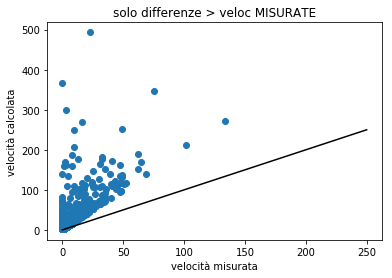

In [22]:
dftemp = dfp[dfp['speed_calc']-dfp['speed'].astype('float')>dfp['speed'].astype('float')]
plt.scatter(dftemp['speed'].astype('float'),dftemp['speed_calc'])
plt.plot([0,250], [0, 250], 'k-')
plt.title('solo differenze > veloc MISURATE')
plt.xlabel('velocità misurata')
plt.ylabel('velocità calcolata')

Text(0,0.5,'velocità calcolata')

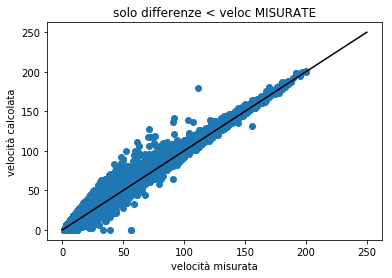

In [23]:
dftemp = dfp[dfp['speed_calc']-dfp['speed'].astype('float')<dfp['speed'].astype('float')]
plt.scatter(dftemp['speed'].astype('float'),dftemp['speed_calc'])
plt.plot([0,250], [0, 250], 'k-')
plt.title('solo differenze < veloc MISURATE')
plt.xlabel('velocità misurata')
plt.ylabel('velocità calcolata')

# ACCELERAZIONI

In [25]:
dfacc = pd.DataFrame()
MAXFILES = 200000
counter = 0

x = []
y = []
z = []

for root,_,files in os.walk('D:\Master\Blob2csv\ACC\\'):
    for file in files:
        #if file.endswith('_POS_beforeAugust.csv'):
        #    continue
        counter += 1
        if counter%100==0:
            print(counter)
        dfa = pd.read_csv(os.path.join(root,file), delimiter=';')
        x.append(max(dfa['accX']))
        y.append(max(dfa['accY']))
        z.append(max(dfa['accZ'])-1)
        if counter > MAXFILES:
            break


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

133000
133100
133200
133300
133400
133500
133600
133700
133800
133900
134000
134100
134200
134300
134400
134500
134600
134700
134800
134900
135000
135100
135200
135300
135400
135500
135600
135700
135800
135900
136000
136100
136200
136300
136400
136500
136600
136700
136800
136900
137000
137100
137200
137300
137400
137500
137600
137700
137800
137900
138000
138100
138200
138300
138400
138500
138600
138700
138800
138900
139000
139100
139200
139300
139400
139500
139600
139700
139800
139900
140000
140100
140200
140300
140400
140500
140600
140700
140800
140900
141000
141100
141200
141300
141400
141500
141600
141700
141800
141900
142000
142100
142200
142300
142400
142500
142600
142700
142800
142900
143000
143100
143200
143300
143400
143500
143600
143700
143800
143900
144000
144100
144200
144300
144400
144500
144600
144700
144800
144900
145000
145100
145200
145300
145400
145500
145600
145700
145800
145900
146000
146100
146200
146300
146400
146500
146600
146700
146800
146900
147000
147100
147200

In [26]:
mod = [np.sqrt(xi**2+yi**2+zi**2) for xi,yi,zi in zip(x,y,z)]

(array([1.50234e+05, 3.66230e+04, 7.51000e+02, 1.07000e+02, 3.60000e+01,
        1.90000e+01, 6.00000e+00, 8.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([-0.6144,  1.3843,  3.383 ,  5.3817,  7.3804,  9.3791, 11.3778,
        13.3765, 15.3752, 17.3739, 19.3726]),
 <a list of 10 Patch objects>)

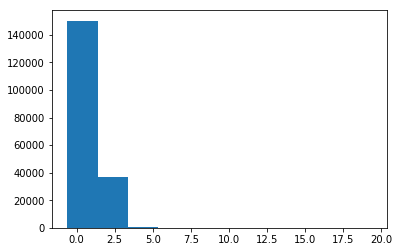

In [28]:
plt.hist(x, bins=10)

(array([4.27510e+04, 1.40933e+05, 3.60500e+03, 3.48000e+02, 8.00000e+01,
        4.00000e+01, 1.40000e+01, 9.00000e+00, 2.00000e+00, 4.00000e+00]),
 array([-0.5462,  1.1262,  2.7986,  4.471 ,  6.1434,  7.8158,  9.4882,
        11.1606, 12.833 , 14.5054, 16.1778]),
 <a list of 10 Patch objects>)

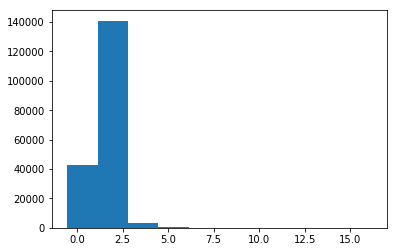

In [29]:
plt.hist(y, bins=10)

(array([1.19459e+05, 6.74300e+04, 7.33000e+02, 8.70000e+01, 3.90000e+01,
        2.60000e+01, 3.00000e+00, 6.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([-1.6352 ,  0.90978,  3.45476,  5.99974,  8.54472, 11.0897 ,
        13.63468, 16.17966, 18.72464, 21.26962, 23.8146 ]),
 <a list of 10 Patch objects>)

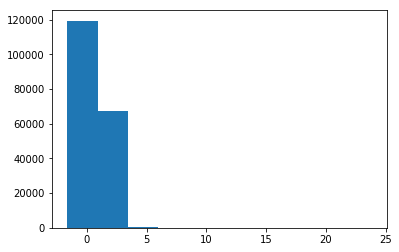

In [30]:
plt.hist(z, bins=10)

(array([1.61834e+05, 2.48010e+04, 8.77000e+02, 1.38000e+02, 6.70000e+01,
        3.20000e+01, 1.30000e+01, 1.60000e+01, 2.00000e+00, 6.00000e+00]),
 array([ 0.1379315 ,  2.7904541 ,  5.44297669,  8.09549928, 10.74802188,
        13.40054447, 16.05306706, 18.70558966, 21.35811225, 24.01063484,
        26.66315743]),
 <a list of 10 Patch objects>)

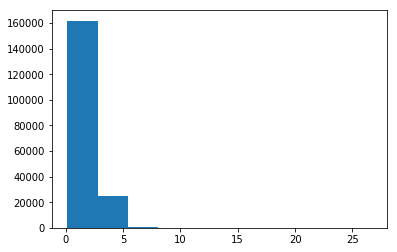

In [31]:
plt.hist(mod, bins=10)

{'whiskers': [<matplotlib.lines.Line2D at 0x201641f0d68>,
 'caps': [<matplotlib.lines.Line2D at 0x201641fc5f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x201641f0828>],
 'medians': [<matplotlib.lines.Line2D at 0x201641fce48>],
 'fliers': [<matplotlib.lines.Line2D at 0x201641fcf28>],
 'means': []}

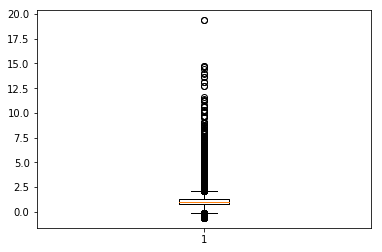

In [33]:
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x201645cad30>,
 'caps': [<matplotlib.lines.Line2D at 0x201645d19b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x201645cabe0>],
 'medians': [<matplotlib.lines.Line2D at 0x201645d1eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x201645db668>],
 'means': []}

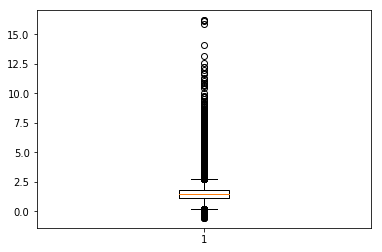

In [34]:
plt.boxplot(y)

{'whiskers': [<matplotlib.lines.Line2D at 0x201646239e8>,
 'caps': [<matplotlib.lines.Line2D at 0x20164623ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x201646234a8>],
 'medians': [<matplotlib.lines.Line2D at 0x20164628ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x20164628ef0>],
 'means': []}

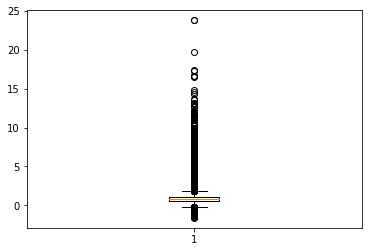

In [35]:
plt.boxplot(z)

{'whiskers': [<matplotlib.lines.Line2D at 0x20164843c50>,
 'caps': [<matplotlib.lines.Line2D at 0x2016484d4e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20164843710>],
 'medians': [<matplotlib.lines.Line2D at 0x2016484dd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2016484de10>],
 'means': []}

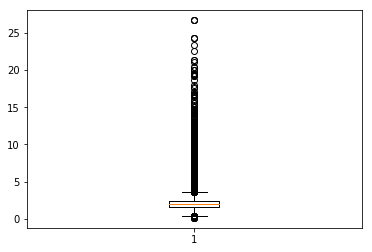

In [36]:
plt.boxplot(mod)

In [ ]:
dfacc.accY.plot.box()
plt.title('accelerazioni Y')
plt.ylabel('componente y (g)')

In [ ]:
dfacc.accZ.plot.box()
plt.title('accelerazioni Z')
plt.ylabel('componente z (g)')

In [ ]:
np.mean(dfacc.accZ)

In [ ]:
dfacc.accModulo.plot.box()
plt.title('accelerazioni MODULO')
plt.ylabel('modulo (g)')

In [21]:

dfat = pd.read_csv('D:\Master\Blob2csv\ACC\\2018_03_03 18_49_52_36198192_265948_ACC_beforeAugust.csv', delimiter=';')


In [4]:
dfat.head()

,datetime,accX,accY,accZ,crashId,deviceId,crash_time
0,2018-03-03 18:49:46.000000,0.0000,0.0,1.0,36198192,265948,2018-03-03 18:49:52
1,2018-03-03 18:49:46.100000,0.0934,0.0,1.0,36198192,265948,2018-03-03 18:49:52
2,2018-03-03 18:49:46.200000,0.0000,0.0,1.0,36198192,265948,2018-03-03 18:49:52
3,2018-03-03 18:49:46.300000,0.0934,0.0,1.0,36198192,265948,2018-03-03 18:49:52
4,2018-03-03 18:49:46.400000,0.0934,0.0,1.0,36198192,265948,2018-03-03 18:49:52


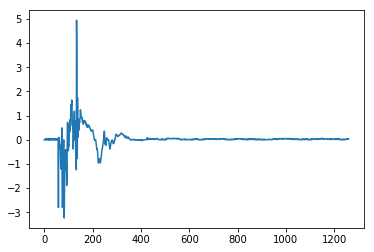

In [5]:
dfat.accY.plot()

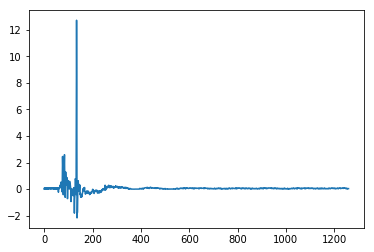

In [12]:
dfat.accX.plot()

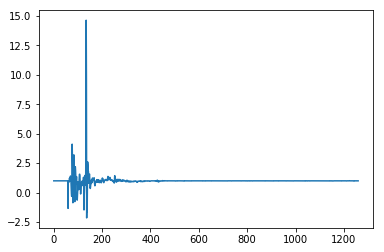

In [13]:
dfat.accZ.plot()

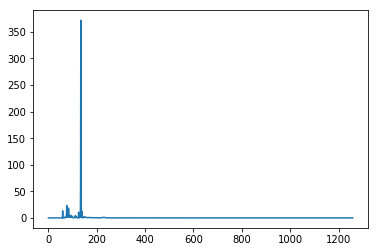

In [23]:
dfat['modu']=dfat.apply(lambda r:r['accX']**2+r['accY']**2+(r['accZ']-1)**2, axis=1)
dfat.modu.plot()
#plt.xlim([120,155])

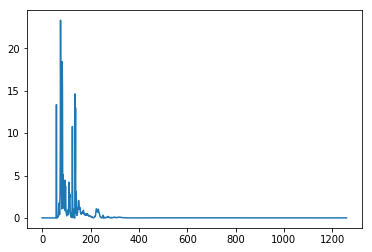

In [24]:
def AccCleaner(dataframe, col, th):
    dataframe = dataframe.apply(lambda r: 0 if r[col]>th else r[col], axis=1)
    return dataframe
    
dfat['modu'] = AccCleaner(dfat, 'modu', 50)
dfat.modu.plot()

In [10]:
from pykalman import KalmanFilter
def reverse_kalman(dataframe):
   # data = dataframe.copy()
    data = dataframe.iloc[::-1].reset_index()
    del data['index']
    data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M:%S.%f')
    data['timestamp'] = data['datetime'].apply(lambda x: x.strftime('%S.%f'))
    data['timestamp'] = data['datetime'].apply(lambda x: float(x.timestamp()))
    #data['timestamp'] = pd.to_numeric(data['datetime'])
    #data['timestamp'] = data['timestamp'].apply(lambda x: -x)
    kf = KalmanFilter(initial_state_mean=0, n_dim_obs=2)
    
    return data
    


datas = reverse_kalman(dfat)

datas.head()

,datetime,accX,accY,accZ,crashId,deviceId,crash_time,mod,modu,timestamp
0,2018-03-03 18:49:55.000000,0.0380,0.0396,0.9989,36198192,265948,2018-03-03 18:49:52,0.003013,0.003013,1.520103e+09
1,2018-03-03 18:49:54.997500,0.0392,0.0301,1.0000,36198192,265948,2018-03-03 18:49:52,0.002443,0.002443,1.520103e+09
2,2018-03-03 18:49:54.995000,0.0380,0.0177,1.0000,36198192,265948,2018-03-03 18:49:52,0.001757,0.001757,1.520103e+09
3,2018-03-03 18:49:54.992500,0.0196,0.0358,1.0000,36198192,265948,2018-03-03 18:49:52,0.001666,0.001666,1.520103e+09
4,2018-03-03 18:49:54.990000,0.0423,0.0255,1.0000,36198192,265948,2018-03-03 18:49:52,0.002440,0.002440,1.520103e+09


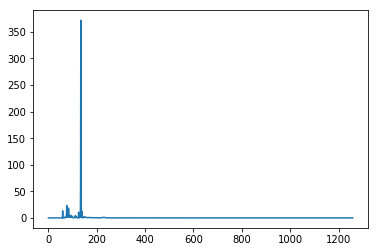

In [11]:
dfat['modu']=dfat.apply(lambda r:r['accX']**2+r['accY']**2+(r['accZ']-1)**2, axis=1)
dfat.modu.plot()

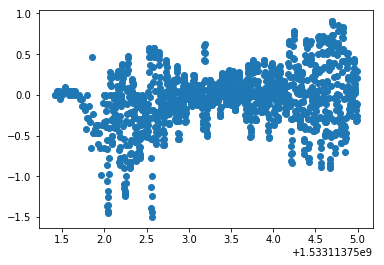

In [12]:
plt.scatter(datas['timestamp'], datas['accY'])

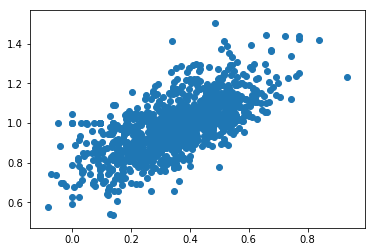

In [16]:
plt.scatter(dfat.accX,dfat.accZ)

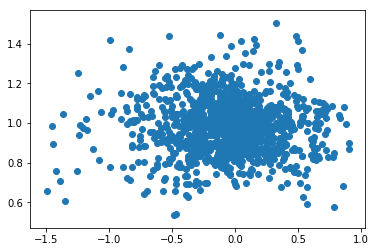

In [17]:
plt.scatter(dfat.accY,dfat.accZ)

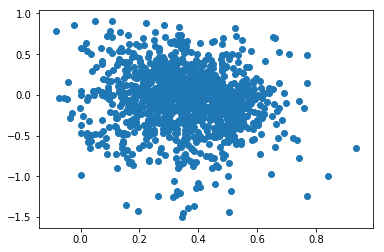

In [18]:
plt.scatter(dfat.accX,dfat.accY)